In [1]:
from pylab import *
import numpy as np


# Homework 6: Angular Momentum

## Part I
The centrifugal radius: $R_c = \frac{j^2}{GM_*}$ tells us how angular momentum determines the radius at which material is deposited at during infall into disk formation. 
If we assume angular momentum conservation from the envelope down to the disk scales, we know that over time each infalling layer, i,  at a radius of $r_i$ has specific angular momentum $j_i = r_i^2 \Omega_i$.

### part a
In the TSC model, for $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$, each layer falls from a radius $r_i = (m_0/2) c_s t$ where $m_0 = 0.975$, a dimensionless constant and $c_s$ is the isothermal sound speed. 
For this model, derive $M_{*}(t)$ and $R_c(t)$. 

### part b
The break-up angular velocity of a rotating body is defined as where the gravitational energy is equal to the rotational energy. Above this value, the body would be torn apart by rotation as gravity would not be able to hold it together. 
Derive the break-up velocity for a protostellar core and calculate it in radians per second for a 1 solar mass core of about 0.1 pc in size. 

### part c
Plot $Rc(t)$ for $c_s = 0.2 \ \mathrm{km \ s^{-1}}$ and $\Omega_i = 2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ for t between 0 and 500 kyr. How fast is the input angular velocity compared to break up? What is the resulting disk size at t=500 kyr? How much mass would have infallen in that time span?

### part d
So far we have only been assuming that $\Omega_i$ is constant solid body rotation, but in principle $\Omega_i(r)$ could be a function of radius within the protostellar core. For instance, if we take the scaling of an turbulent sub-sonic eddy as in Larson's law, $v_{rot} \propto R^{-0.33}$. Solve for the corresponding $\Omega_i(r)$ and $Rc(t)$ with this more generalized behavior. 

### part e
Let's say that the angular velocity has the form: $\Omega_s \left( \frac{r}{r_s}\right)^{p}$. Where $\Omega_s =  2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ at $r_s = 0.05 \ \mathrm{pc}$ (to match measured values from observations at the same scale). Plot $Rc(t)$ for both the  uniform $\Omega_i$ and the turbulent $\Omega_i$ case on the same plot, assuming the power-law form above. When do both models have the same $R_c$? 
Based on what you know about mass deposition during disk formation, qualitatively, what would be the difference betweeen the disks formed under these two assumptions?

### Answers

Part a: We're taking a look at the Terebey-Shu-Cassen, 1984 model for the collapse of a cloud core. We're starting simple, and using equations we've seen in class!
<br> $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$ <br> $\frac{dM}{dt} = \frac{m_0 c_s^3}{G}$ <br> $dM = \frac{m_0 c_s^3 dt}{G}$ Integrating this... <br> $M_{\star} = \frac{m_0 c_s^3 t}{G}$ <br>
Then, we can take the original centrifugal radius equation, $R_c = \frac{j^2}{GM_*}$<br>$R_c = \frac{r_i^4 \Omega_i^2}{GM_*}$<br>$R_c = \frac{((m_0/2) c_s t)^4 \Omega_i^2}{G \frac{m_0 c_s^3 t}{G}}$<br>$R_c = \frac{(m_0 t)^4 c_s \Omega_i^2}{16}$

Part b: Taking the gravitational and rotational energies and setting them equal: <br>${E_{grav}} = E_{rot}$ We only care about the magnitude of the energies. We can expand on the energies (recalling the gravitational energy of a rotating sphere and the rotational energy of a sphere, using the moment of inertia of a sphere): <br>
$\frac{-3 G M m}{5 R} = \frac{1}{2}I \Omega^2$<br> $\frac{-3 G M m}{5 R} = \frac{1}{2}\Omega^2*\frac{2}{5} R^2$ <br> $\frac{-3 G M m}{5 R} = \frac{1}{5}\Omega^2R^2$<br> $\Omega = \sqrt{\frac{3GM}{R^3}}$ (which is the Keplerian velocity!) Plugging numbers in, we get ~ 1.08e-13.

In [2]:
#Will be using cgs because <3 <3
G = 6.67e-8 #cm^3 g^-1 s
pctocm = 3.24e18 #pc to cm conversion
kgtog = 1e3 #kg to g conversion
M_sol = 1.99e30 #kg

def buOmega(): #rad/s
    R = 0.1*pctocm
    M_sol_g = M_sol*kgtog
    angvel = np.sqrt(3*G*M_sol_g/(R**3))
    return angvel

print(buOmega())


1.0820132205360431e-13


Part c: Plotting the centrifugal radius:

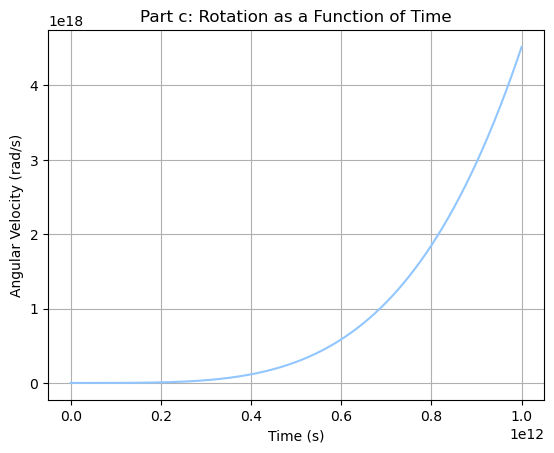

In [3]:
c_s = 0.2 #km/s
m_0 = 0.975
t = np.linspace(0, 500)
kyrtos = 3.15e9
Omega = 2e-14 #rad/s
t = np.logspace(-1,12,1000000) #log spacing of 0 to 1e12 seconds - 0 to 500 kyr

def cent_rad(Omega):
    r_i = (((m_0*t)**4)*(c_s)*(Omega**2))/16
    return r_i

plt.style.use('seaborn-v0_8-pastel')
plt.plot(t, cent_rad(Omega))
plt.title('Part c: Rotation as a Function of Time')
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid()

Part d: Taking $v_{rot} \propto R^{-0.33}$, we can expand a bit. Since we know that $v_{rot} = \Omega R$: <br> $\Omega(r) = \frac{R^{-0.33}_i}{R_i}$ <br> and if we take our centripetal radius equation again: <br> $R_c(t) = \frac{(m_0 t)^4 c_s \Omega_i^2}{16}$ <br> $R_c(t) = \frac{(m_0 t)^4 c_s (R^{-0.33})^2}{16{R^2}}$ <br> $R_c(t) = \frac{(m_0 t)^4 c_s R^{1.76}}{16}$ <br> $R_c(t)^{-0.76} = \frac{(m_0 t)^4 c_s}{16}$

In [12]:
r = cent_rad(Omega)

def radialOmega(r): #rad/s
    r_s = 0.05*pctocm
    ang = 2e-14 #rad/s
    p = -0.33
    print(r)
    print(r_s)
    angvel = ang*(r/r_s)**p
    return angvel(r)

uniform_angvel = (2e-14)*((1/0.05*pctocm)**-0.33)


plt.plot(cent_rad(Omega), radialOmega(r))
plt.plot(cent_rad(Omega), buOmega())
plt.title('Part e: Uniform vs Turbulent Angular Velocity')
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid()

[4.51843945e-34 4.51898050e-34 4.51952161e-34 ... 4.51735756e+18
 4.51789847e+18 4.51843945e+18]
1.62e+17


TypeError: 'numpy.ndarray' object is not callable

## Part II: *Menu* 

For additional menu points this week, use the $Rc(t)$ you calculated above, and the $\dot{\Sigma}(r,t)$ profile from Cassen+Moosman 1981 to numerically integrate through time to calculate $\Sigma(t)$ for the two cases in part d. (This gives us a very rough understanding of the resulting disk as it does not take into account angular momentum transport during this phase). Plot the resulting surface density profiles and comment on their differences. 

*Hint*: You may want your timesteps to be logarithmically spaced